In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib as pl

In [41]:
from collections import namedtuple, defaultdict
from itertools import cycle

In [3]:
p = pl.Path('../output/')
dirs = [x for x in p.iterdir() if x.is_dir()]
dirs = [list(x) for x in map(lambda x: x.iterdir(), dirs)]
dirs

[[PosixPath('../output/200-8/file-135-1.csv'),
  PosixPath('../output/200-8/file-86-1.csv'),
  PosixPath('../output/200-8/file-17-1.csv'),
  PosixPath('../output/200-8/file-1-2.csv'),
  PosixPath('../output/200-8/file-59-1.csv'),
  PosixPath('../output/200-8/file-103-2.csv'),
  PosixPath('../output/200-8/file-80-2.csv'),
  PosixPath('../output/200-8/file-56-2.csv'),
  PosixPath('../output/200-8/file-22-1.csv'),
  PosixPath('../output/200-8/file-30-1.csv'),
  PosixPath('../output/200-8/file-113-2.csv'),
  PosixPath('../output/200-8/file-128-1.csv'),
  PosixPath('../output/200-8/file-124-1.csv'),
  PosixPath('../output/200-8/file-82-2.csv'),
  PosixPath('../output/200-8/file-102-2.csv'),
  PosixPath('../output/200-8/file-5-1.csv'),
  PosixPath('../output/200-8/file-151-1.csv'),
  PosixPath('../output/200-8/file-4-1.csv'),
  PosixPath('../output/200-8/file-194-1.csv'),
  PosixPath('../output/200-8/file-24-2.csv'),
  PosixPath('../output/200-8/file-8-2.csv'),
  PosixPath('../output/200-8/f

In [4]:
ds = {}
for a, b in zip([8,6,4], dirs):
    ds[a] = list(map(pd.read_csv, b))
ds

{8: [     initial_weight  weight  none-anonymity   mean-min   max-mean  median-min  \
  0               135       1               0  13.025355  19.174645   12.200000   
  1               135       1               0  12.593646  24.192068   11.285714   
  2               135       1               0  13.077010  21.922990   12.500000   
  3               135       1               0  12.547873  21.252127   10.466667   
  4               135       1               0  12.605781  24.094219   10.700000   
  ..              ...     ...             ...        ...        ...         ...   
  194             135       1               0  12.261493  19.167079   10.928571   
  195             135       1               0  12.751680  20.034034   11.285714   
  196             135       1               0  12.580331  23.086335   10.666667   
  197             135       1               0  13.237915  17.962085   11.700000   
  198             135       1               0  12.566495  23.202736   10.769231   
 

In [110]:
def get_stats(dsi):
    i, dsi = dsi
    stats = defaultdict(lambda: defaultdict(lambda: None))
    for df in dsi:
        iw, costw, an, meann, meanm, mediann, medianm = df.mean()
        stats[costw][iw] = {'initial-w':iw, 'k':i, 'costw':costw,'none-anonymity': an,'mean-min': meann,'max-mean': meanm,'median-mean': mediann,'max-median': medianm}
    return stats

In [112]:
stats = {}
list_stats = map(get_stats, ds.items())
for st in list_stats:
    k = st[1][1]['k']
    stats[k] = st
stats

{8: defaultdict(<function __main__.get_stats.<locals>.<lambda>()>,
             {1.0: defaultdict(<function __main__.get_stats.<locals>.<lambda>.<locals>.<lambda>()>,
                          {135.0: {'initial-w': 135.0,
                            'k': 8,
                            'costw': 1.0,
                            'none-anonymity': 0.0,
                            'mean-min': 12.708604967756978,
                            'max-mean': 22.478523509572508,
                            'median-mean': 11.102538862589114,
                            'max-median': 24.08458961474037},
                           86.0: {'initial-w': 86.0,
                            'k': 8,
                            'costw': 1.0,
                            'none-anonymity': 0.0,
                            'mean-min': 12.652021934514394,
                            'max-mean': 23.23917095969357,
                            'median-mean': 11.057859560874638,
                            'max-median'

In [13]:
def scater(dfs):

    for i, df in dfs.items():
        df.plot.scatter(x='initial-w',y='max-mean', title=f'In weight {i}')

In [8]:
def get_data_frames(stats, max_range=3):
    columns = stats[1][135].keys()
    data = {}
    for cw in range(1,4+1):
        dat = defaultdict(lambda: [])
        for s in stats[cw].values():
            for c in columns:
                dat[c].append(s[c])
        data[cw] = dat
    dfs = {}

    for cw in range(1, max_range+1):
        dfs[cw] = pd.DataFrame(data=data[cw])
    return dfs

In [9]:
def show(stats, max_range=3):
    scater(get_data_frames(stats, max_range))

In [113]:
get_data_frames(stats[6])

{1:      initial-w  k  costw  none-anonymity  mean-min   max-mean  median-mean  \
 0        135.0  6    1.0         0.00000  9.139055  17.566858     7.919481   
 1         86.0  6    1.0         0.00000  9.112823  18.575095     7.837834   
 2         17.0  6    1.0         0.00000  8.878807  21.688023     7.413145   
 3         59.0  6    1.0         0.00000  9.060668  18.731509     7.799716   
 4         22.0  6    1.0         0.01005  8.949760  21.278350     7.507842   
 ..         ... ..    ...             ...       ...        ...          ...   
 195       89.0  6    1.0         0.00000  9.097739  18.377033     7.885995   
 196      149.0  6    1.0         0.00000  9.152026  17.729681     7.995610   
 197       55.0  6    1.0         0.00000  9.062211  19.136922     7.829786   
 198       92.0  6    1.0         0.00000  9.079982  18.351352     7.876895   
 199      178.0  6    1.0         0.00000  9.136498  17.807272     7.984808   
 
      max-median  
 0     18.786432  
 1     19

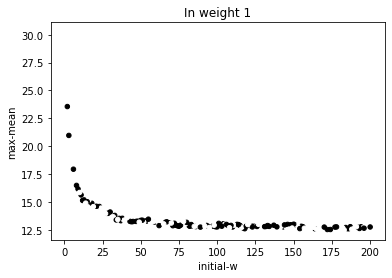

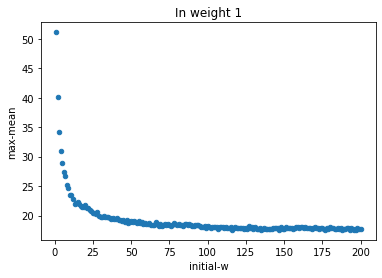

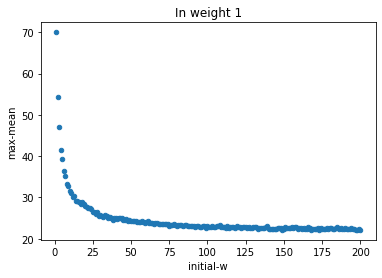

In [114]:
axes = get_data_frames(stats[4], 2)[1].plot.scatter(x='initial-w',y='max-mean', title=f'In weight 1', c=[1,2]*100)
axes = get_data_frames(stats[6], 2)[1].plot.scatter(x='initial-w',y='max-mean', title=f'In weight 1')
axes = get_data_frames(stats[8], 2)[1].plot.scatter(x='initial-w',y='max-mean', title=f'In weight 1')

In [115]:
df4['initial-w']

0      135.0
1       86.0
2       17.0
3       59.0
4       22.0
       ...  
195     89.0
196    149.0
197     55.0
198     92.0
199    178.0
Name: initial-w, Length: 200, dtype: float64

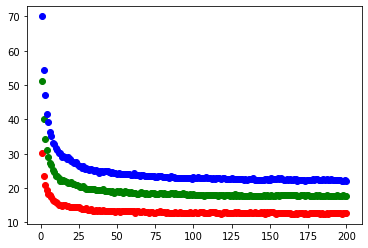

In [119]:
df4, df6, df8 = get_data_frames(stats[4], 2)[1], get_data_frames(stats[6], 2)[1], get_data_frames(stats[8], 2)[1]
plt.scatter(df4['initial-w'], df4['max-mean'], c='red')
plt.scatter(df6['initial-w'], df6['max-mean'], c='green')
plt.scatter(df8['initial-w'], df8['max-mean'], c='blue')

In [141]:
min(df8['max-mean'])

22.13173869388568

In [142]:
max(df8['max-mean'])

70.03516181612915

,initial-w,k,costw,none-anonymity,mean-min,max-mean,median-mean,max-median
8,5.0,8,1.0,0.020101,12.117014,39.251481,9.275865,42.092630
10,4.0,8,1.0,0.050251,12.108146,41.554964,9.019474,44.643635
121,2.0,8,1.0,0.547739,12.301720,54.331208,8.319731,58.313197
126,7.0,8,1.0,0.005025,12.174118,35.197482,9.648066,37.723534
141,9.0,8,1.0,0.000000,12.216925,32.861704,9.944710,35.133920
158,1.0,8,1.0,3.155779,12.284297,70.035162,7.292008,75.027451
167,8.0,8,1.0,0.000000,12.173850,33.220605,9.773684,35.620771
185,3.0,8,1.0,0.135678,12.153991,46.979485,8.779395,50.354080
189,6.0,8,1.0,0.025126,12.130861,36.370656,9.424968,39.076549


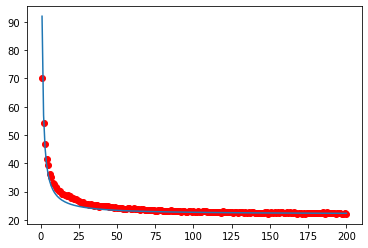

In [162]:
x = np.linspace(1,200, 200)
y = 1/x * 70 + 22
plt.plot(x,y)
plt.scatter(x=df8['initial-w'], y=df8['max-mean'], c='red')
df8.loc[lambda x: x['initial-w'] < 10]

In [161]:
dy = lambda x: -70/(x**2)
mx, x = 0,0
for i in range(8, 30):
    dif = (dy(i-1) - dy(i+1))**2
    mx = max(dif, mx)
    if dif == mx:
        x = i
print(x, mx)

8 0.3185178964132522
